In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from dataclasses import dataclass

import vice
import pickle

import sys
sys.path.append("../..")

In [3]:
import surp.analysis_scripts.apogee_analysis as aah
from surp.analysis_scripts.vice_model import vice_model
import surp.analysis_scripts.plotting_utils as pluto
import surp.analysis_scripts.gas_phase_data
import surp.analysis_scripts.rc_params

In [4]:
sf = pluto.fig_saver("../figures")

In [5]:
@dataclass
class model_id():
    agb: str = None
    eta: str = None
    f_agb: str = None
    beta: str = None
    name: str = None
    version: str = ""
    

In [6]:
def find_model(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta + id.version
    else:
        name = id.name
    file_name = "../output/" + name + ".json"
    return vice_model(file_name)

In [7]:
def compare_cooh(models, ax=None):
    if ax is None:
        ax = plt.gca()
        
    name_0 = list(models.keys())[0]
    i = 0
    for name, model in models.items():
        f = model.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.6), label=name, plot_data=False, ax=ax)
        i+= 1
    # legend_outside()
    aah.plot_cooh()
    return f    

    
def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()
            
def compare_cooh_stars(models):
    for name, model in models.items():
        model.plot_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.6), label=name)
        plt.title(name)
        plt.show()

In [8]:
def compare_coofe(models):
    name_0 = list(models.keys())[0]

    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.6, 0.4), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee")
        plt.title("[O/H] = %1.1f" % o)
        pluto.legend_outside()  
        plt.show()

def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()

In [9]:
def plot_coofe(models, o0=-0.0, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    name_0 = list(models.keys())[0]

    for o in [o0]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.3, 0.3), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee", ax=ax)
        ax.set_title("[O/H] = %1.1f" % o)
        # legend_outside()  
        # plt.show()


In [10]:
def compare_mdf(models):
    for ratio in ["[o/h]", "[fe/h]", "[o/fe]", "[c/o]", "[c/h]"]:
        for name, model in models.items():
            model.plot_mdf(ratio, label = name, xlim=(-1.5, 1))
        legend_outside()
        plt.show()

In [11]:
def compare_stars(model_names, labels=None):
    if labels is None:
        labels = model_names
        
    models = {label: find_model(name) for label, name in zip(labels, model_names)}
    
    compare_cooh_stars(models)
    compare_coofe_stars(models)

In [12]:
def compare(names, labels):
    models = {label: find_model(name) for name, label in zip(names, labels)}
    
    fig, axs = pluto.dual_plot()
    
    plt.sca(axs[0])
    compare_cooh(models)  

    axs[0].set(
        xlabel = r"[$\alpha$/H]",
        ylabel = r"[C/$\alpha$]", 
        xlim = (-0.6, 0.6), 
        ylim = (-0.5, 0.2),
        # xticks = [-0.6, -0.4, -0.2, 0, 0.2]
    )
    
    plt.sca(axs[1])
    plot_coofe(models)
    pluto.fancy_legend()
    
    axs[1].set(
        xlabel = r"[$\alpha$/Fe]",
        ylabel = "",
        title = "",
        xlim = (-0.15, 0.4),
       # xticks = [-0.1, -0.2, -0.1, 0, 0.1]
    )


# Deep exploration of fiducial model

In [13]:
fiducial.plot_stars?

Object `fiducial.plot_stars` not found.


In [14]:
fiducial = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1.0", beta="0.4", version="_v0.1.3"))

In [15]:
fiducial.stars["all"]

,formation_time,zone_origin,zone_final,mass,z(fe),z(o),z(n),z(c),abs_z,r_origin,...,[c/h],[o/fe],[n/fe],[n/o],[c/fe],[c/o],[c/n],z,[m/h],age
527275,13.18,37.0,37.0,239356.0,0.003570,0.013701,0.002455,0.005703,0.02,3.7,...,0.383198,-0.062772,0.108537,0.171309,-0.058916,0.003856,-0.167453,0.035385,0.402695,0.01
104130,2.60,65.0,26.0,297021.7,0.001025,0.006174,0.000399,0.001931,2.36,6.5,...,-0.087128,0.133194,-0.138693,-0.271888,0.012906,-0.120288,0.151599,0.013259,-0.023628,10.59
94530,2.36,65.0,39.0,288278.6,0.000990,0.006008,0.000379,0.001815,0.32,6.5,...,-0.113948,0.136113,-0.145671,-0.281785,0.000851,-0.135262,0.146522,0.012792,-0.039195,10.83
163727,4.09,63.0,36.0,334851.7,0.001103,0.006656,0.000499,0.002192,0.17,6.3,...,-0.032131,0.133689,-0.073248,-0.206937,0.035752,-0.097937,0.109000,0.014541,0.016481,9.10
490503,12.26,51.0,78.0,235991.3,0.002281,0.009787,0.001255,0.003684,0.01,5.1,...,0.193377,-0.014341,0.011555,0.025896,-0.054208,-0.039867,-0.065764,0.023665,0.227980,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50851,1.27,25.0,13.0,600931.6,0.000969,0.007321,0.000421,0.002036,0.17,2.5,...,-0.064091,0.231338,-0.090786,-0.322124,0.060061,-0.171277,0.150848,0.014956,0.028682,11.92
54906,1.37,53.0,15.0,325578.4,0.000941,0.006077,0.000314,0.001713,0.42,5.3,...,-0.139042,0.163130,-0.205882,-0.369012,-0.002232,-0.165362,0.203650,0.012588,-0.046178,11.82
296588,7.41,94.0,133.0,121277.6,0.000842,0.004094,0.000258,0.001415,0.42,9.4,...,-0.222199,0.040204,-0.242841,-0.283045,-0.036785,-0.076989,0.206056,0.009196,-0.182524,5.78
301683,7.54,41.0,37.0,440452.4,0.002569,0.011258,0.001610,0.004663,0.07,4.1,...,0.295767,-0.005030,0.068324,0.073354,-0.003329,0.001701,-0.071653,0.027969,0.300555,5.65


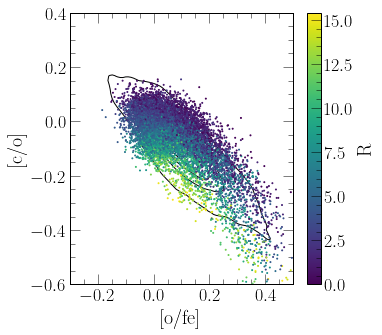

In [16]:
fiducial.plot_stars("[o/fe]", "[c/o]", c="r_origin", c_label="R")
plt.xlabel("[o/fe]")
plt.ylabel("[c/o]")
plt.xlim(-0.3, 0.5)
plt.ylim(-0.6, 0.4)
sf("cooofe_scatter")

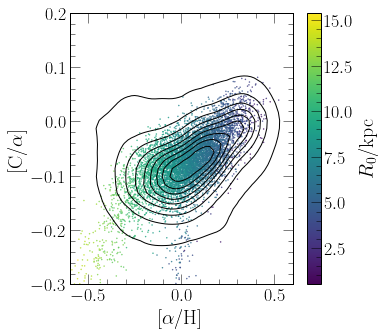

In [17]:
fig, ax = plt.subplots()
s = fiducial.stars["solar"]
plt.sca(ax)
N = len(s)
dx = 0.03
dy = 0.03
plt.scatter(s["[o/h]"] + np.random.normal(0, dx, N), s["[c/o]"] + np.random.normal(0, dy, N), c = s["r_origin"], s=0.2, zorder=2)
plt.colorbar(label="$R_0$/kpc")
aah.plot_contour("[mg/h]", "[c/mg]")

ax.set(
    xlabel=r"[$\alpha$/H]",
    ylabel=r"[C/$\alpha$]",
    xlim=(-0.6, 0.6), 
    ylim=(-0.3, 0.2)
)
sf("cooh_scatter")

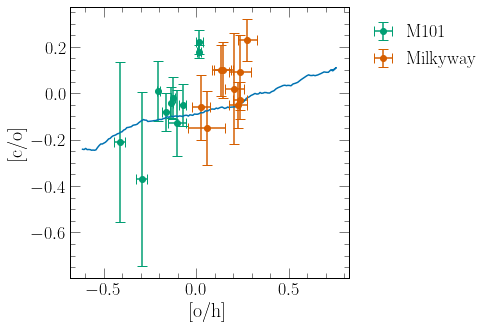

In [122]:
fiducial.plot_gas("[o/h]", "[c/o]")
sf("cooh_gas")

In [18]:
fiducialcial.history.set_index(["time", "R"])

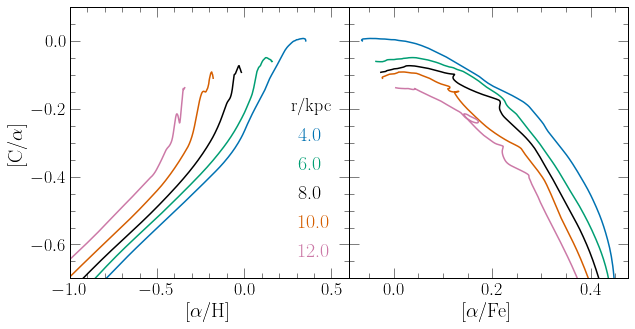

In [21]:
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharey=True)

plt.sca(axs[0])
fiducial.plot_R_slices("[o/h]", "[c/o]", ax=axs[0])

# for t in [2, 5, 8, 11, 13]:
#     for R in [4, 6, 8, 10, 12]:
#         df = h.loc[t, R]bbox_inches = "tight"
#         plt.scatter(df["[o/h]"], df["[c/o]"])

axs[0].set(
    xlim=(-1, 0.6),
    ylim=(-0.7, 0.1),
    xlabel=r"[$\alpha$/H]",
    ylabel=r"[C/$\alpha$]",
    #xticks=(-0.75, -0.5, -0.25, 0, 0.25, 0.5)
)

fiducial.plot_R_slices("[o/fe]", "[c/o]", ax=axs[1], legend=False)
axs[1].set(
    ylabel="",
    xlabel=r"[$\alpha$/Fe]"
)

sf("evo_tracks")

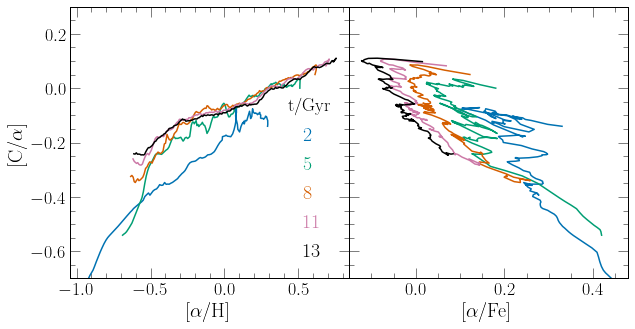

In [22]:
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharey=True)

plt.sca(axs[0])
fiducial.plot_t_slices("[o/h]", "[c/o]", ax=axs[0])
axs[0].set(
    ylim=(-0.7, 0.3),
    xlabel=r"[$\alpha$/H]",
    ylabel=r"[C/$\alpha$]",
    #xticks=(0, 0.2, 0.4)
)


fiducial.plot_t_slices("[o/fe]", "[c/o]", ax=axs[1], legend=False)
axs[1].set(
    ylabel="",
    xlabel=r"[$\alpha$/Fe]"
)
sf("evo_slices")

## Out of Box AGB models

In [23]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="o", beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["C11", "K10", "V13", "K16"]
models = {label: find_model(name) for name, label in zip(names, labels)}

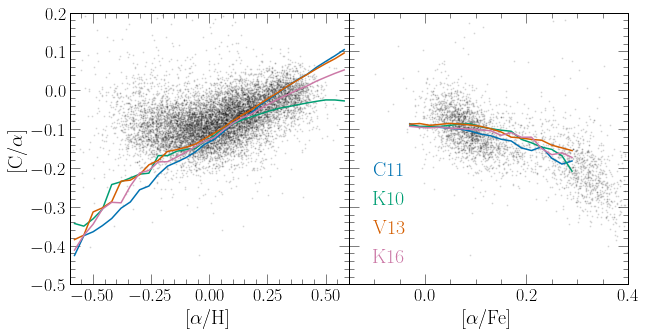

In [24]:
compare(names, labels)
sf("oob_agb")

# Messing with da yields

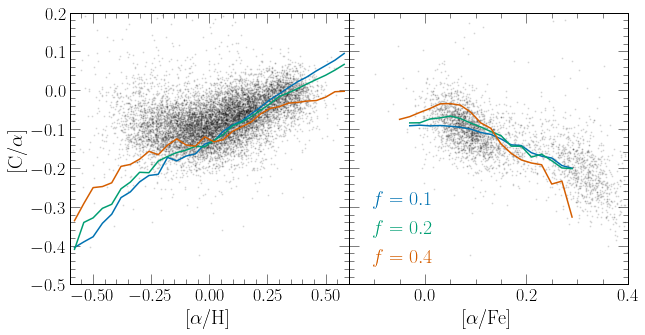

In [117]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb="cristallo11", f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["$f=0.1$", "$f=0.2$", "$f=0.4$"]
compare(names, labels)
sf("f_agb")

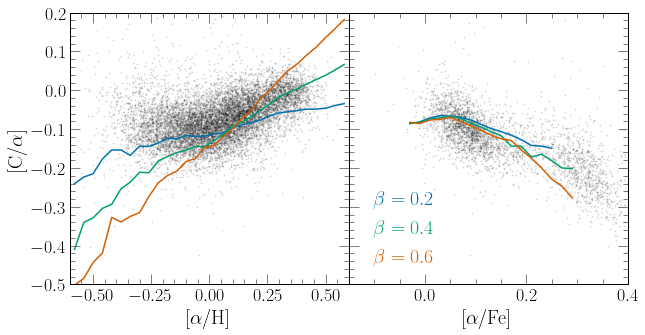

In [119]:
names = []
for beta in ["0.2", "0.4", "0.6"]:
    names.append(model_id(agb="cristallo11", f_agb="0.2", beta=beta, eta="1.0", version="_v0.1.3"))
labels = [r"$\beta=0.2$", r"$\beta=0.4$", r"$\beta=0.6$"]
compare(names, labels)
sf("beta")

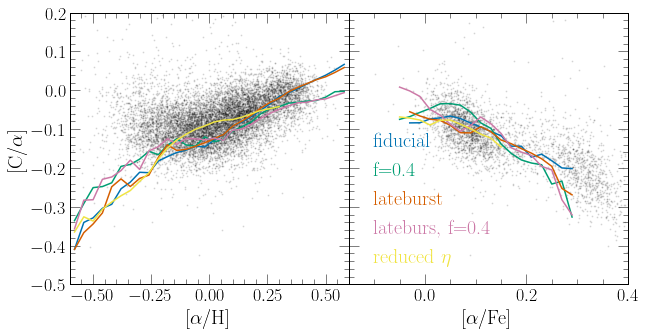

In [120]:
fnames = ["cristallo11_f0.2_Z0.4_eta1.0_v0.1.3", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3", "cristallo11_f0.2_Z0.4_eta1.0_v0.1.3_lateburst", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3_lateburst",  "cristallo11_f0.2_Z0.4_eta0.3_v0.1.3"]
names = []
for s in fnames:
    names.append(model_id(name=s))
    
labels=["fiducial", "f=0.4", "lateburst", "lateburs, f=0.4", r"reduced $\eta$"]
compare(names, labels)
sf("lateburst_eta")

# This is where the chaos begin

In [112]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="0.2", beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["C11", "K10", "V13", "K16"]
models = {label: find_model(name) for name, label in zip(names, labels)}

Text(0, 0.5, '[C/O]')

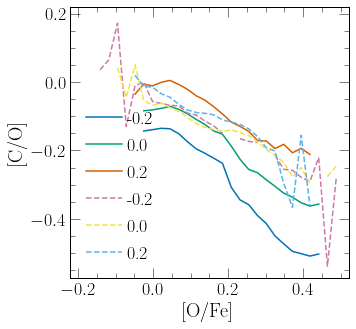

In [115]:

df = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1.0", beta="0.6", version="_v0.1.3")).history
for o0 in [-0.2, 0, 0.2]:

    sl = df["[o/h]"] > o0-0.05
    sl &= df["[o/h]"] < o0 + 0.05

    pluto.plot_mean_track(df[sl]["[o/fe]"], df[sl]["[c/o]"], label="%1.1f" % o0, xlim=(-0.2, 0.5))


    
df = aah.subgiants
for o0 in [-0.2, 0, 0.2]:
    sl = df["MG_H"] > o0-0.05
    sl &= df["MG_H"] < o0 + 0.05

    pluto.plot_mean_track(df[sl]["MG_FE"], df[sl]["C_MG"], label="%1.1f" % o0, ls="--", xlim=(-0.2, 0.5))



plt.legend()

plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")


plt.legend()



plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")

In [39]:
fnames = ["cristallo11_f0.2_Z0.4_eta0.3_v0.1.3_lateburst", "cristallo11_f0.2_Z0.4_eta0.3_v0.1.3_A2.5_lateburst", "cristallo11_f0.2_Z0.4_eta1.0_v0.1.3_lateburst"]
names = []
for s in fnames:
    names.append(model_id(name=s))
labels = ["reduced eta", "big", "normal lateburst"]

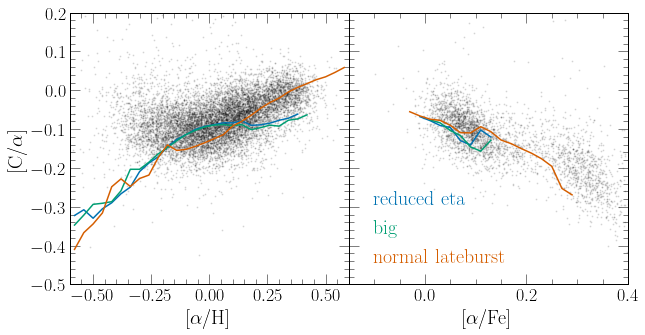

In [28]:
compare(names, labels)

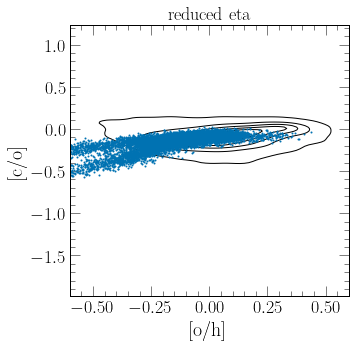

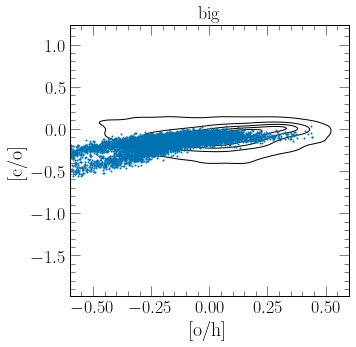

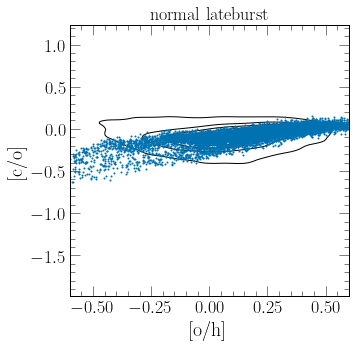

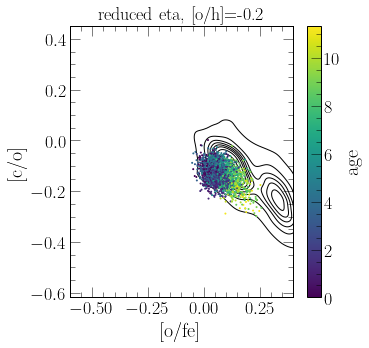

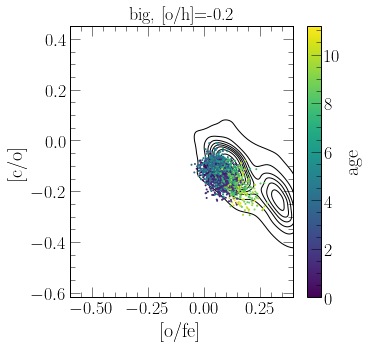

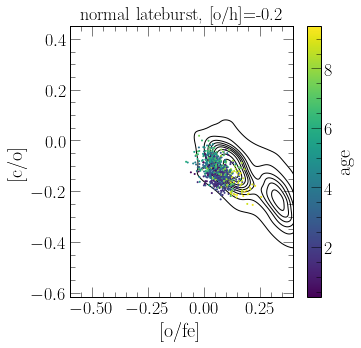

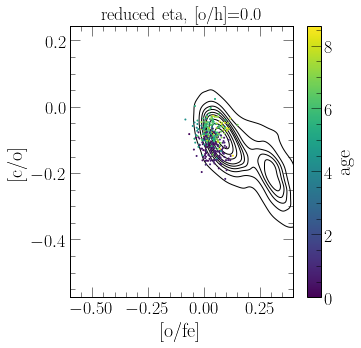

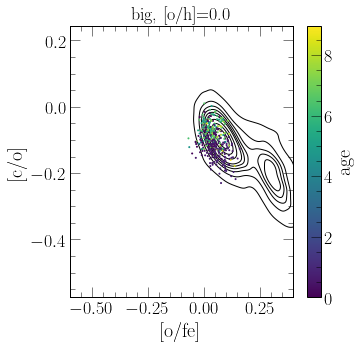

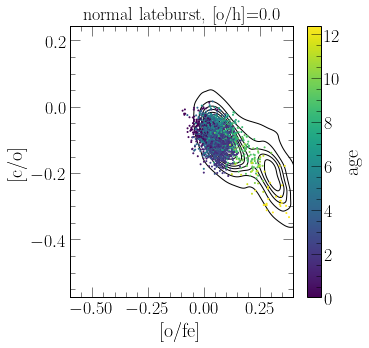

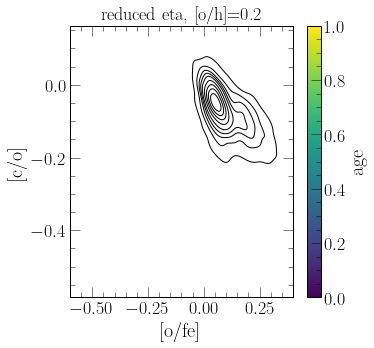

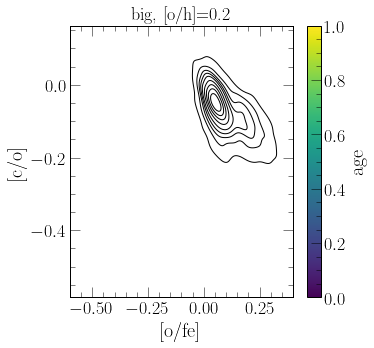

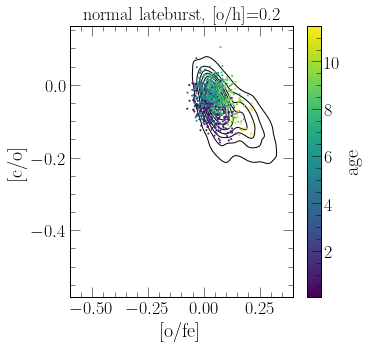

In [40]:
compare_stars(names, labels)

In [33]:
fnames = ["cristallo11_f0.2_Z0.4_eta0.3_v0.1.3_lateburst", "cristallo11_f0.2_Z0.4_eta0.3_v0.1.3_lateburst_ia0.8", "cristallo11_f0.2_Z0.4_eta0.3_v0.1.3_lateburst_ia1.2"]
names = []
for s in fnames:
    names.append(model_id(name=s))
labels = ["reduced eta", "lowered Fe Ia", "increased Fe Ia"]

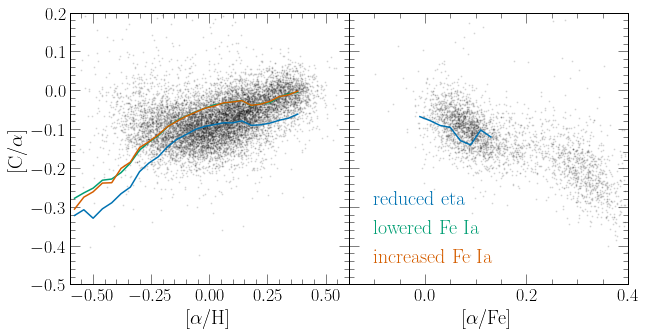

In [32]:
compare(names, labels)

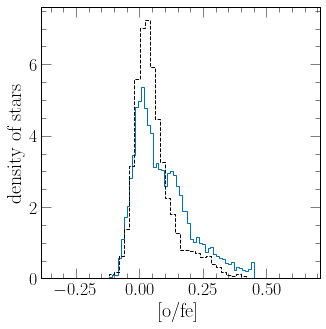

In [44]:
fiducial.plot_mdf("[o/fe]")

In [108]:
model = vice_model("../output/cristallo11_f0.2_Z0.2_eta1.0_v0.1.3_lateburst.json")

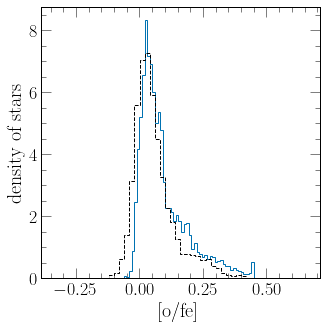

In [109]:
model.plot_mdf("[o/fe]")

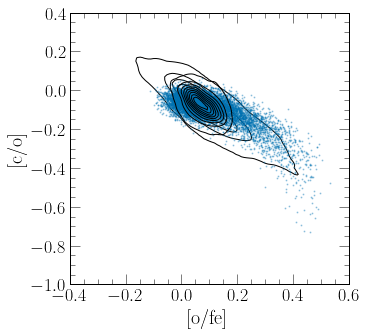

In [110]:
model.plot_stars("[o/fe]", "[c/o]", s=1, alpha=0.3)
plt.xlim(-0.4, 0.6)
plt.ylim(-1, 0.4)
aah.plot_contour("[mg/fe]", "[c/mg]")

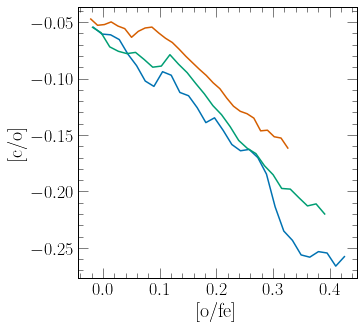

In [111]:
for o_h in [-0.1, 0.1, 0.3]:
    model.plot_mean_coofe(o_h, plot_data=False)

# The Metallicity dependence of C/O - O/Fe

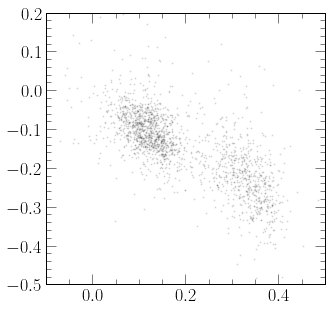

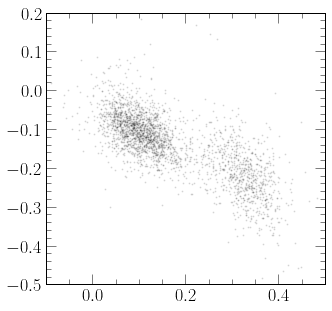

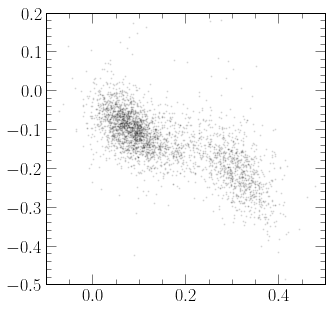

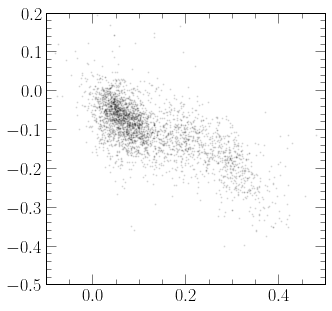

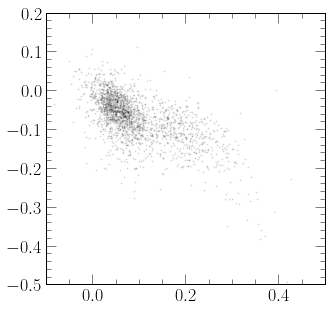

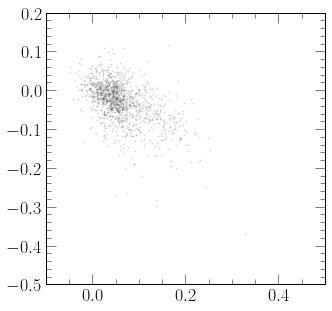

In [73]:
for o0 in [-0.2, -0.1, 0, 0.1, 0.2, 0.3]:
    aah.plot_coofe(o0)
    plt.xlim(-0.1, 0.5)
    plt.ylim(-0.5, 0.2)
    plt.show()

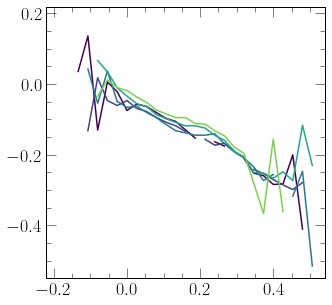

In [107]:
cmap = plt.get_cmap("viridis")

l = np.arange(-0.2, 0.3, 0.1)
N = len(l)
for i in range(N):
    o0 = l[i]
    df = aah.subgiants
    do = 0.05
    filt = df["MG_H"] > o0 - do
    filt &= df["MG_H"] < o0 + do
    df = df[filt]

    pluto.plot_mean_track(df["MG_FE"], df["C_MG"], xlim=(-0.2, 0.6), color=cmap(i/N))

(-0.2, 0.5)

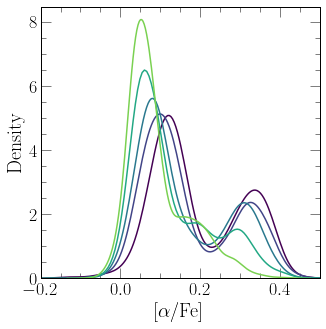

In [99]:
cmap = plt.get_cmap("viridis")

l = np.arange(-0.2, 0.3, 0.1)
N = len(l)
for i in range(N):
    o0 = l[i]
    df = aah.subgiants
    do = 0.05
    filt = df["MG_H"] > o0 - do
    filt &= df["MG_H"] < o0 + do
    df = df[filt]

    sns.kdeplot(df["MG_FE"], color=cmap(i/N))


plt.xlabel(r"[$\alpha$/Fe]")
plt.xlim(-0.2, 0.5)

In [84]:
import seaborn as sns